<a href="https://colab.research.google.com/github/mayankb-21/machine-learning-lab/blob/main/ml_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


In [3]:
# Load the dataset (Iris dataset for simplicity)
data = load_iris()
X = data.data
y = data.target

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Initialize the classifier
model = LogisticRegression(max_iter=200)

# Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-validation results
print(f"Cross-validation accuracy: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.3f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.3f}")


Cross-validation accuracy: [1.         0.9047619  0.95238095 1.         0.95238095]
Mean cross-validation accuracy: 0.962
Standard deviation of cross-validation accuracy: 0.036


In [5]:
# Train the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.3f}")


Accuracy on the test set: 1.000


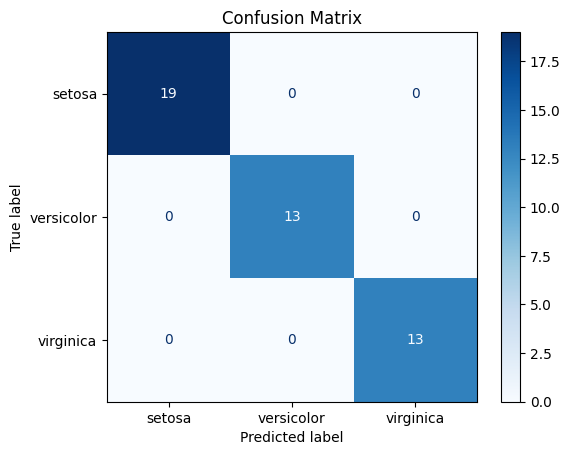

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


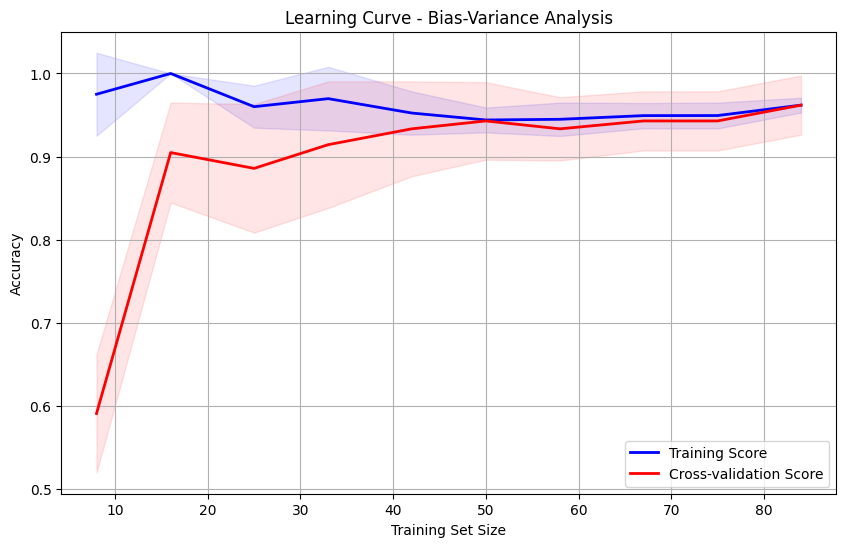

In [7]:
# Bias-Variance Analysis with Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve to analyze bias-variance tradeoff
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', lw=2)
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red', lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Learning Curve - Bias-Variance Analysis')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


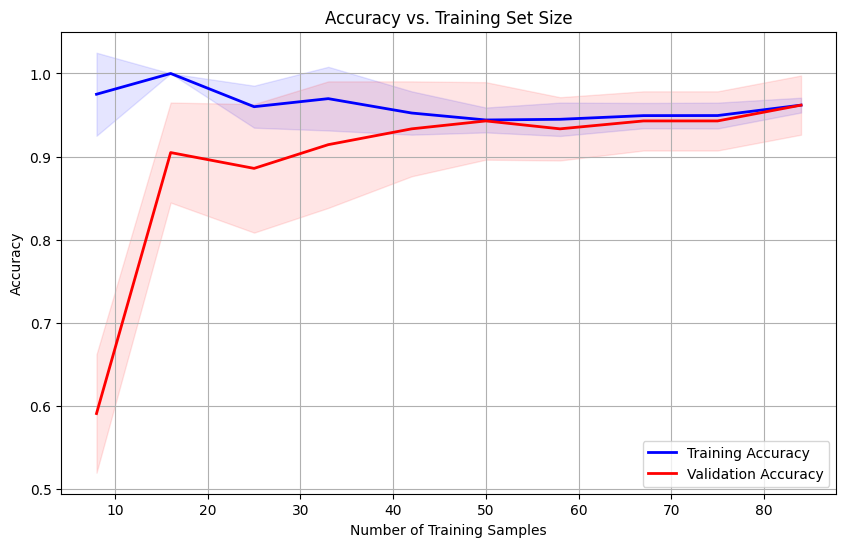

In [8]:
# Accuracy vs. Number of training samples chart
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', lw=2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='red', lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()
